In [1]:
import pandas as pd
import warnings
import rpy2
warnings.filterwarnings('ignore')

In [2]:
%load_ext rpy2.ipython

In [3]:
import plotly.graph_objects as go

def plot_(title, *series):
    # Crear una figura
    fig = go.Figure()

    # Agregar cada serie de datos al gráfico
    for x_variable, y_variable, label in series:
        fig.add_trace(go.Scatter(
            x=x_variable,
            y=y_variable,
            mode='lines',
            name=label,
            line=dict(width=2)
        ))

    # Actualizar el tipo de eje x a 'date'
    fig.update_xaxes(type='date')

    # Ajustar el título para que esté centrado
    fig.update_layout(title_text=title, title_x=0.5)

    # Personalizar el selector de rango de fechas
    fig.update_layout(
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                         label="1d",
                         step="day",
                         stepmode="backward"),
                    dict(count=7,
                         label="1w",
                         step="day",
                         stepmode="backward"),
                    dict(count=1,
                         label="1m",
                         step="month",
                         stepmode="backward"),
                    dict(count=3,
                         label="3m",
                         step="month",
                         stepmode="backward"),
                    dict(count=6,
                         label="6m",
                         step="month",
                         stepmode="backward"),
                    dict(count=1,
                         label="1y",
                         step="year",
                         stepmode="backward"),
                    dict(count=2,
                         label="2y",
                         step="year",
                         stepmode="backward"),
                    dict(count=3,
                         label="3y",
                         step="year",
                         stepmode="backward"),
                    dict(count=5,
                         label="5y",
                         step="year",
                         stepmode="backward"),
                    dict(count=7,
                         label="7y",
                         step="year",
                         stepmode="backward"),
                    dict(step="all")
                ])
            ),
            rangeslider=dict(
                visible=True
            ),
            type="date"
        ),
        yaxis=dict(
            autorange=True,
            type="linear"
        )
    )

    # Personalizar los títulos de los ejes
    fig.update_layout(
        xaxis_title="Tiempo",
        yaxis_title="Precio en dolares"
    )

    # Personalizar la leyenda
    fig.update_layout(
        legend=dict(
            orientation="v",
            yanchor="top",
            y=1,
            xanchor="left",
            x=-.35
        )
    )

    # Mostrar el gráfico
    fig.show()

# 0 Importación de datos

In [4]:
import yfinance as yf

ticker_name = 'BC'

data = yf.download(ticker_name, start='2000-01-01', end='2010-01-01')
print(data.shape)
data.head()

[*********************100%%**********************]  1 of 1 completed

(2515, 6)


Open      High      Low    Close  Adj Close  Volume
Date                                                              
2000-01-03  22.0000  22.09375  21.6875  21.9375  15.344914  286700
2000-01-04  21.9375  22.12500  20.8750  20.9375  14.645434  338700
2000-01-05  20.6875  21.62500  20.6875  21.0625  14.732865  214000
2000-01-06  21.1250  21.31250  20.8750  21.2500  14.864022  232700
2000-01-07  21.2500  21.62500  20.9375  21.3750  14.951455  207800

In [5]:
df = pd.DataFrame()
df["Date"] = pd.to_datetime(data.index)
df["Close"] = data["Close"].values
display(df.head(10))
display(df.shape)

df_completo = df.copy()
df_completo.set_index('Date', inplace=True)
df_completo = df_completo.resample('1D').mean().ffill()
display(df_completo.head(10))
df_completo.shape

Date    Close
0 2000-01-03  21.9375
1 2000-01-04  20.9375
2 2000-01-05  21.0625
3 2000-01-06  21.2500
4 2000-01-07  21.3750
5 2000-01-10  21.4375
6 2000-01-11  21.4375
7 2000-01-12  21.3750
8 2000-01-13  21.5625
9 2000-01-14  21.3125

(2515, 2)

Close
Date               
2000-01-03  21.9375
2000-01-04  20.9375
2000-01-05  21.0625
2000-01-06  21.2500
2000-01-07  21.3750
2000-01-08  21.3750
2000-01-09  21.3750
2000-01-10  21.4375
2000-01-11  21.4375
2000-01-12  21.3750

(3651, 1)

In [6]:
%R -i df

Además: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages


In [7]:
%%R
library(tidyverse)
library(fpp3)
library(lubridate)


df=df %>% 
  mutate(Date=ymd(Date)) %>% 
  as_tsibble(index = Date) %>%
  fill_gaps(.full=TRUE) %>%
  fill('Close', .direction = 'down')
head(df, 10)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
# A tsibble: 10 x 2 [1D]
   Date       Close
   <date>     <dbl>
 1 2000-01-03  21.9
 2 2000-01-04  20.9
 3 2000-01-05  21.1
 4 2000-01-06  21.2
 5 2000-01-07  21.4
 6 2000-01-08  21.4
 7 2000-01-09  21.4
 8 2000-01-10  21.4
 9 2000-01-11  21.4
10 2000-01-12  21.4


── Attaching packages ────────────────────────────────────────────── fpp3 0.5 ──
✔ tsibble     1.1.4     ✔ fable       0.3.3
✔ tsibbledata 0.4.1     ✔ fabletools  0.4.1
✔ feasts      0.3.1     
── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()


In [8]:
plot_('Acciones Bancolombia', (df["Date"], df["Close"], "Close"))

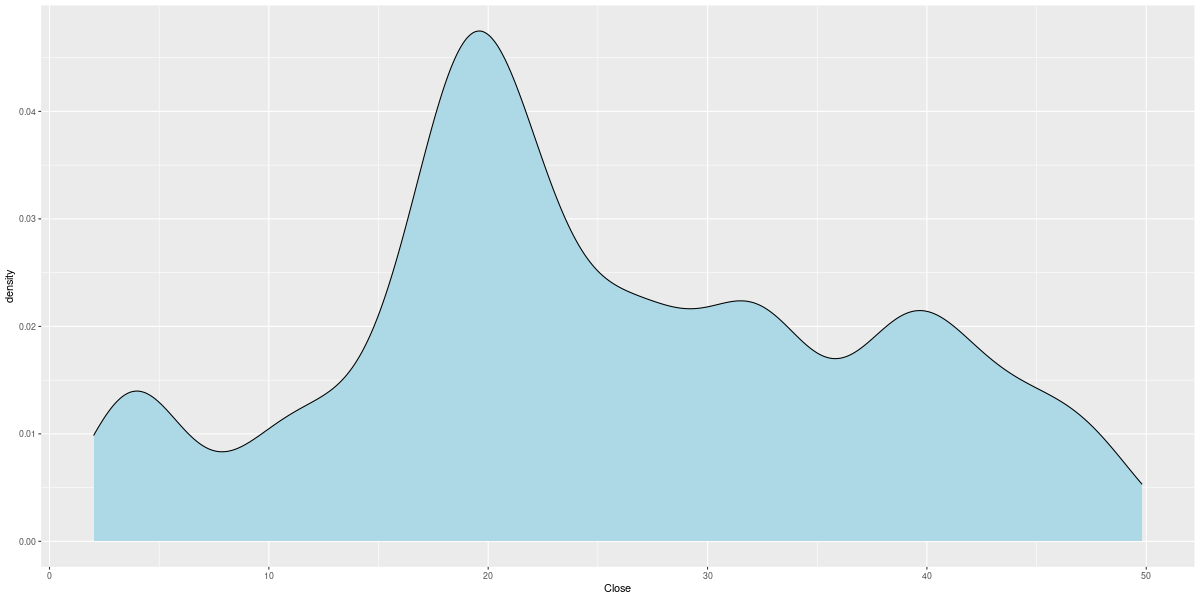

In [9]:
%%R -w 1200 -h 600
library(patchwork)
ggplot(df,aes(x=Close))+
  geom_density(fill="lightblue")

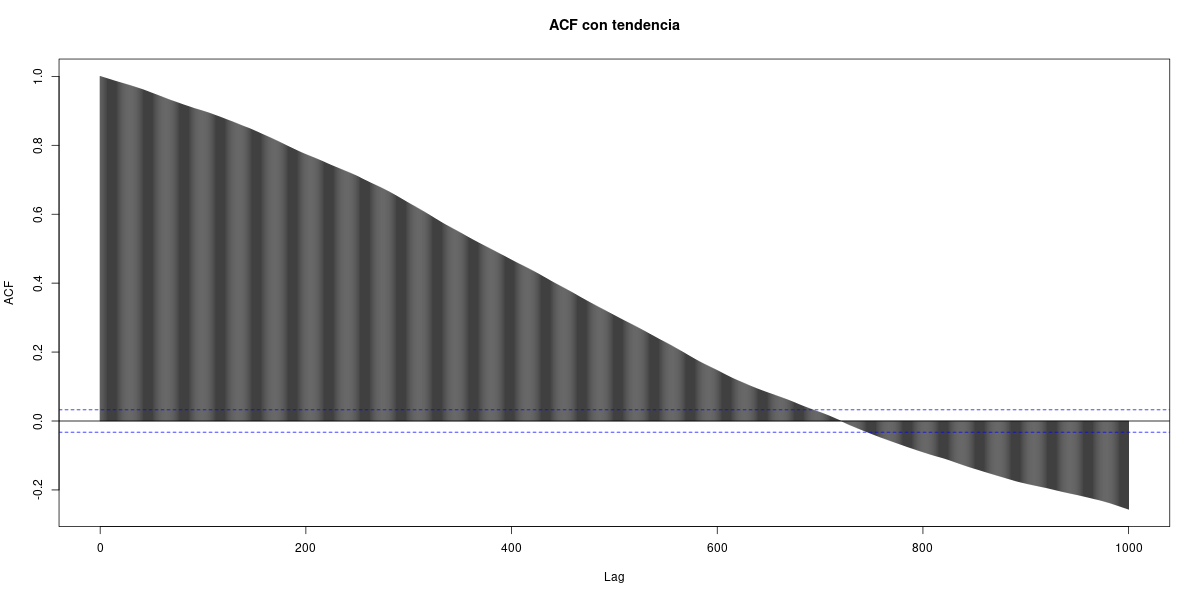

In [10]:
%%R  -w 1200 -h 600
acf(df$Close, lag.max = 1000, main = "ACF con tendencia")

In [11]:
%%R 

df

# A tsibble: 3,651 x 2 [1D]
   Date       Close
   <date>     <dbl>
 1 2000-01-03  21.9
 2 2000-01-04  20.9
 3 2000-01-05  21.1
 4 2000-01-06  21.2
 5 2000-01-07  21.4
 6 2000-01-08  21.4
 7 2000-01-09  21.4
 8 2000-01-10  21.4
 9 2000-01-11  21.4
10 2000-01-12  21.4
# ℹ 3,641 more rows
# ℹ Use `print(n = ...)` to see more rows


# 1

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Attaching package: ‘MASS’

The following object is masked from ‘package:patchwork’:

    area

The following object is masked from ‘package:dplyr’:

    select



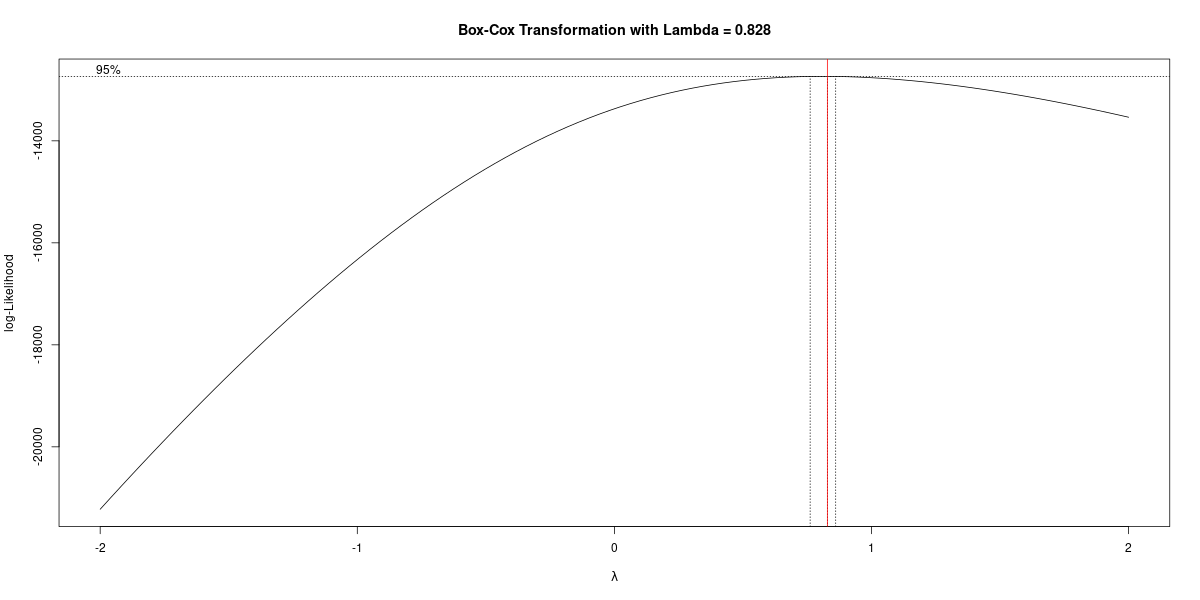

In [12]:
%%R -w 1200 -h 600

library(forecast)
library(MASS)

b <- boxcox(df$Close ~ 1)
lambda <- b$x[which.max(b$y)]

title(main = paste("Box-Cox Transformation with Lambda =", round(lambda, 3) ))
abline(v = lambda, col = "red")

In [13]:
from scipy.stats import boxcox

df_completo['BoxCox_Close'], lambda_value = boxcox(df_completo['Close']) 
print(lambda_value)
plot_(f'Estabilización de la Varianza (Box-cox λ ={lambda_value:.3f} )', (df_completo.index, df_completo["Close"], "Datos Originales"),
      (df_completo.index, df_completo["BoxCox_Close"], "BoxCox"))

0.809978741307756


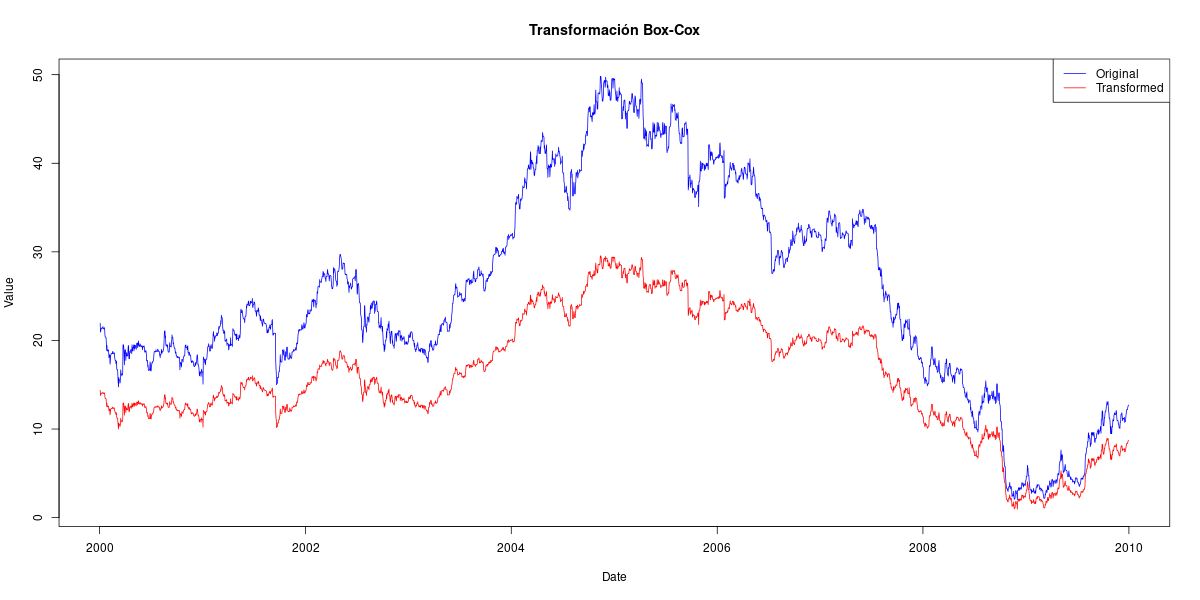

In [14]:
%%R -w 1200 -h 600

transformed_data <- forecast::BoxCox(df$Close, lambda = lambda)
plot(df$Date, df$Close, type = "l", col = "blue", ylim = range(c(df$Close, transformed_data)), 
     xlab = "Date", ylab = "Value", main = paste("Transformación Box-Cox"))
lines(df$Date, transformed_data, col = "red")
legend("topright", legend = c("Original", "Transformed"), col = c("blue", "red"), lty = 1)

# 2. Estimación de la tendencia

## 2.1 Loess

In [15]:
from statsmodels.nonparametric.smoothers_lowess import lowess


frac = 0.05  
smoothed_values = lowess(df_completo['BoxCox_Close'], df_completo.index, frac=frac, it=0)
trend_removed = df_completo['BoxCox_Close'] - smoothed_values[:, 1]

plot_('Eliminación de Tendencia por Lowees', (df_completo.index, df_completo["BoxCox_Close"], "BoxCox"),
      (df_completo.index, smoothed_values[:, 1], "Suavizado"),
      (df_completo.index, trend_removed, "Sin Tendencia"))
      

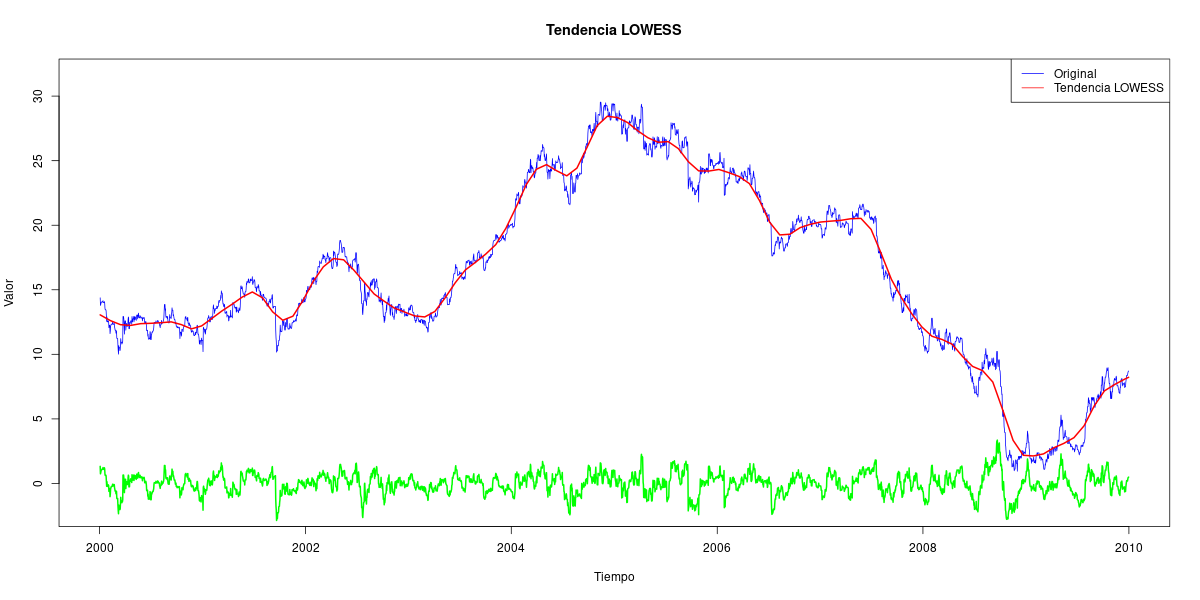

In [16]:
%%R -w 1200 -h 600

# Supongamos que tienes un dataframe df con una columna llamada 'Index'

# Calcular LOWESS
trend_lowess_R <- lowess(transformed_data,  f = 0.05, iter = 0)
trend_removed <- transformed_data - trend_lowess_R$y

# Crear un gráfico de la serie original y la tendencia LOWESS
plot(df$Date, transformed_data, type='l', col='blue', xlab='Tiempo', ylab='Valor', 
     main='Tendencia LOWESS', ylim=c(-2, max(transformed_data)+2))
lines(df$Date, trend_lowess_R$y, col='red', lwd=2)
lines(df$Date, trend_removed, col='green', lwd=2)
legend('topright', legend=c('Original', 'Tendencia LOWESS'), col=c('blue', 'red'), lty=1)



Attaching package: ‘astsa’

The following object is masked from ‘package:forecast’:

    gas



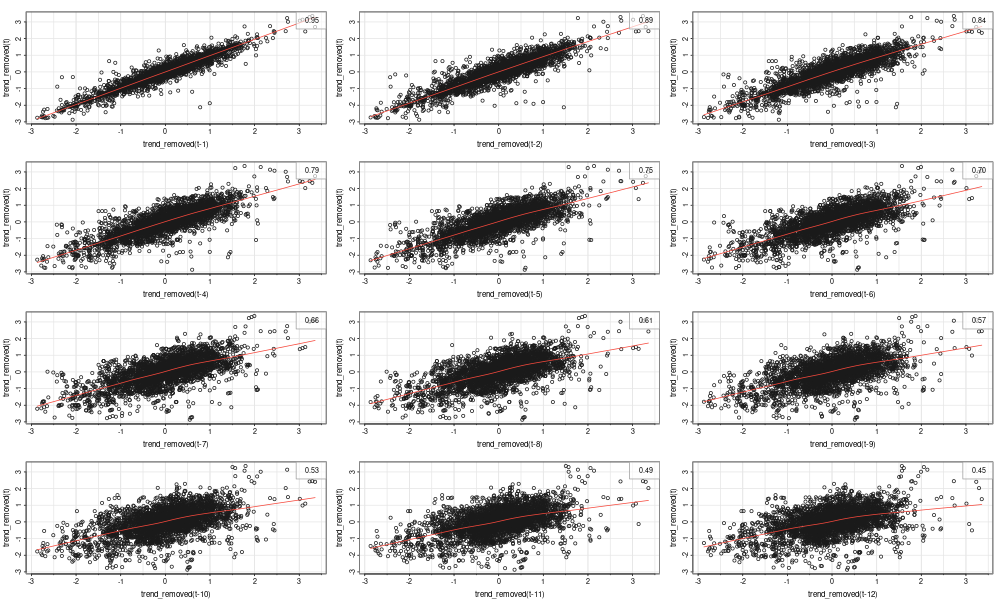

In [17]:
%%R -w 1000 -h 600
options(repr.plot.width=20, repr.plot.height=6)
library(astsa)
astsa::lag1.plot(trend_removed, 12)

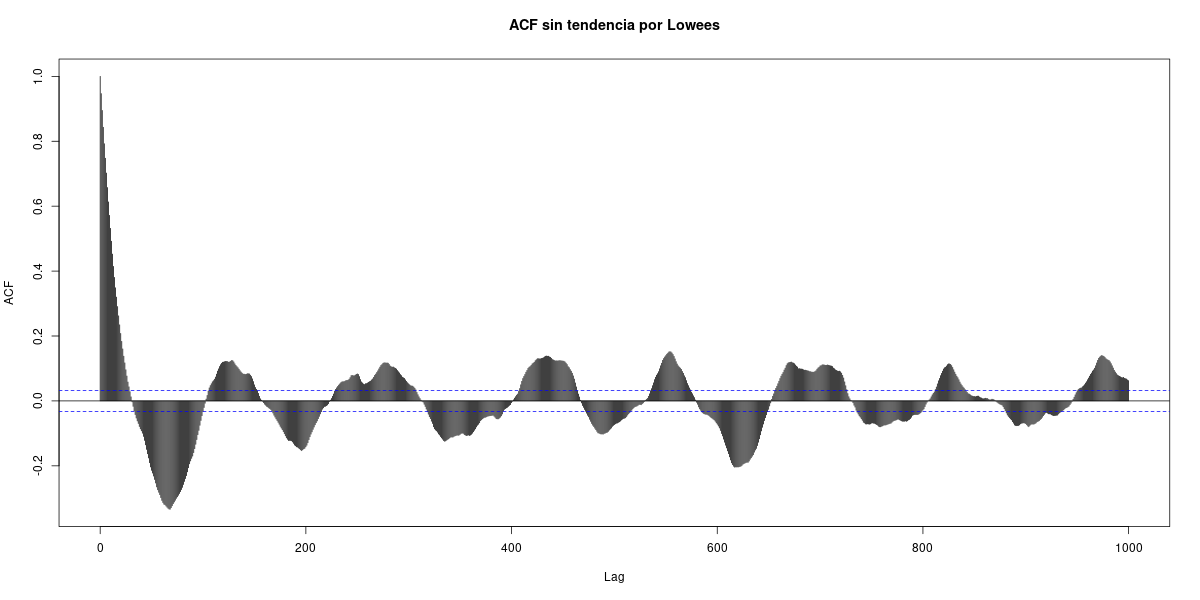

In [18]:
%%R -w 1200 -h 600

acf(trend_removed, lag.max = 1000, main = "ACF sin tendencia por Lowees")

$time.lag
 [1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
[26] 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
[51] 50

$mutual.information
 [1] 2.08356874 1.10546405 0.81600333 0.63497701 0.51813431 0.43635503
 [7] 0.37544671 0.32602121 0.27963197 0.24407718 0.21375973 0.18885575
[13] 0.17406881 0.16377607 0.15093661 0.13431017 0.11905295 0.11103116
[19] 0.10600712 0.09785594 0.09296995 0.09299585 0.08125523 0.07359221
[25] 0.07079827 0.07060564 0.06737744 0.07057559 0.07272332 0.06664193
[31] 0.06190714 0.06264173 0.06281381 0.06373615 0.06260337 0.06815274
[37] 0.06676340 0.06995075 0.07373835 0.07067595 0.07487893 0.08059800
[43] 0.07807929 0.08353159 0.08296117 0.08094970 0.08533817 0.08760485
[49] 0.08695407 0.09305504 0.09033848

$units
[1] "Nats"

$n.partitions
[1] 15

attr(,"class")
[1] "mutualInf"


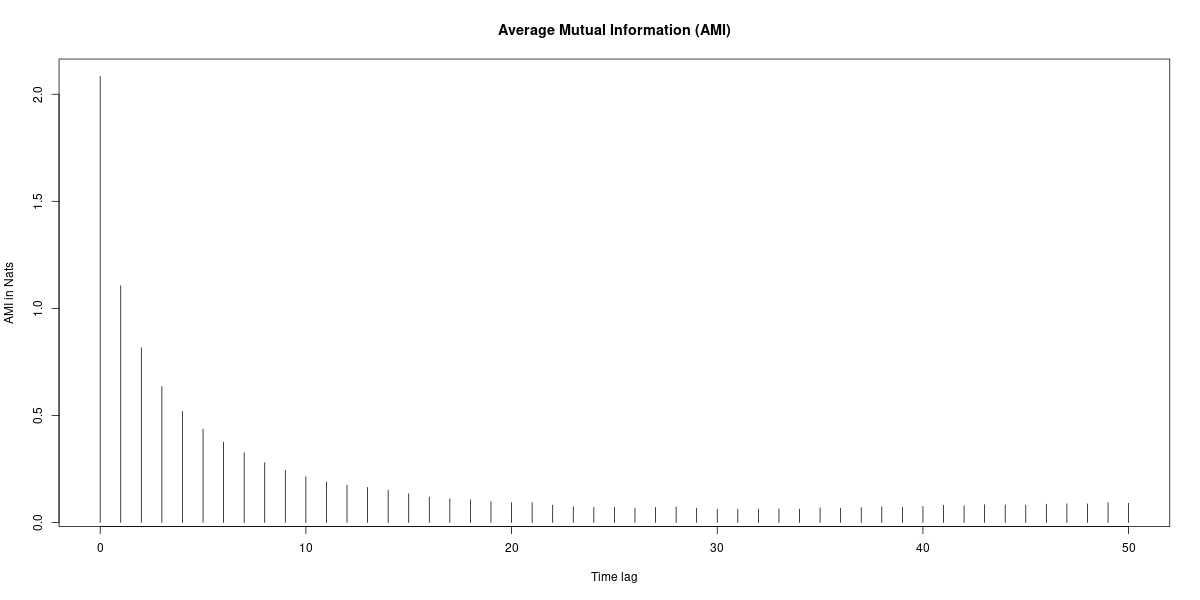

In [19]:
%%R -w 1200 -h 600
nonlinearTseries::mutualInformation(trend_removed,lag.max = 50, main="Información mutua")

## 2.2 Diferencia ordinaria



Apliquemos una diferencia ordinaria de orden 1 a la serie

$$
\nabla^1 Y_t=(1-B)^1 Y_t=Y_t-Y_{t-1}
$$

In [20]:
Close_diff = df_completo['BoxCox_Close'].diff()

plot_('Diferenciación de la Serie Temporal', (df_completo.index, df_completo["BoxCox_Close"], "BoxCox"),
      (df_completo.index, Close_diff, "Diferencia Ordinaria"))

In [21]:
%R -i Close_diff

In [22]:
%%R

Close_diff <- na.omit(Close_diff)

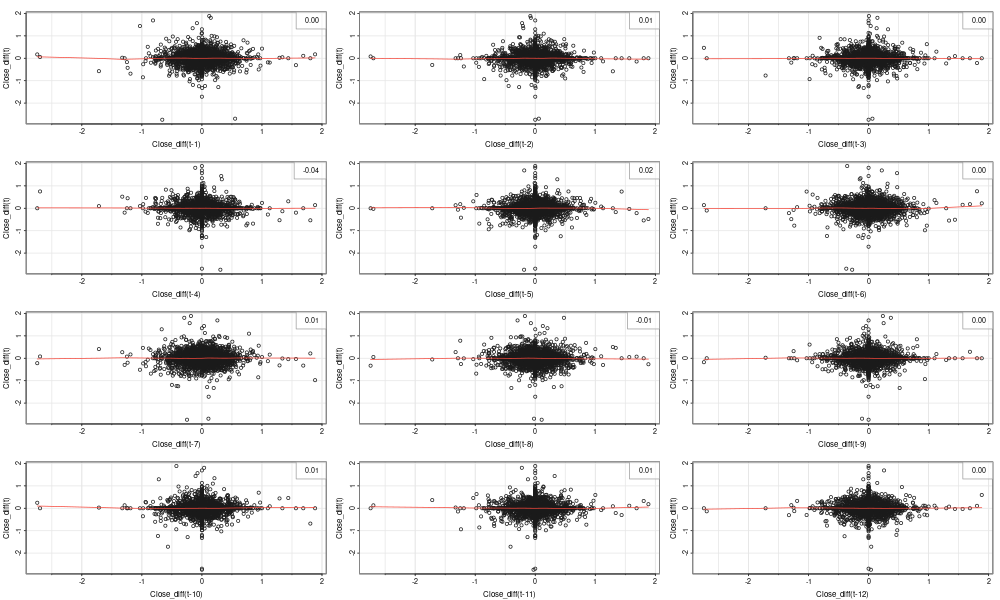

In [23]:
%%R -w 1000 -h 600
options(repr.plot.width=20, repr.plot.height=6)
library(astsa)
astsa::lag1.plot(Close_diff, 12)

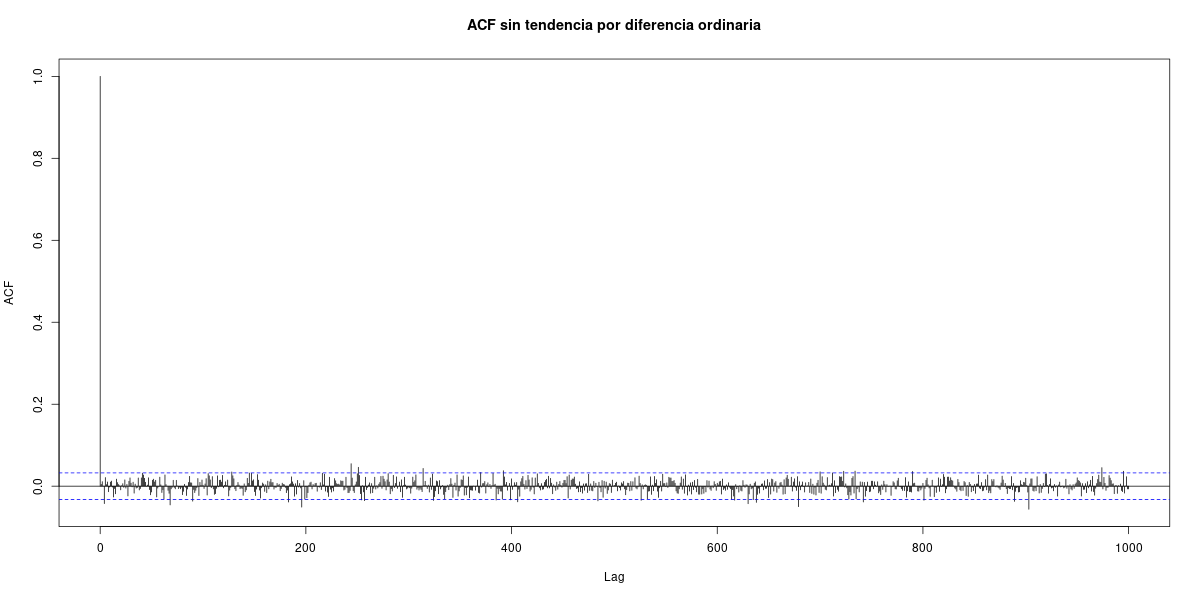

In [24]:
%%R -w 1200 -h 600

acf(Close_diff, lag.max = 1000, main = "ACF sin tendencia por diferencia ordinaria")

$time.lag
 [1]  0  1  2  3  4  5  6  7  8

  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
[26] 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
[51] 50

$mutual.information
 [1] 1.14218089 0.02175340 0.01468928 0.01562458 0.01839114 0.01691451
 [7] 0.01790505 0.05990039 0.01297552 0.01541495 0.01711615 0.01818979
[13] 0.01236344 0.02151468 0.05679676 0.01807884 0.01585098 0.01580736
[19] 0.01958676 0.01540459 0.01334834 0.05147114 0.01775354 0.01498095
[25] 0.01885186 0.01853078 0.01661502 0.01731175 0.04715032 0.01690150
[31] 0.01747021 0.01766919 0.01690003 0.01743826 0.01870695 0.05611722
[37] 0.01994689 0.01828810 0.02176537 0.02250940 0.01983600 0.02144932
[43] 0.05210094 0.01926632 0.01770268 0.02002451 0.02064409 0.01425370
[49] 0.02004527 0.04431153 0.01490978

$units
[1] "Nats"

$n.partitions
[1] 15

attr(,"class")
[1] "mutualInf"


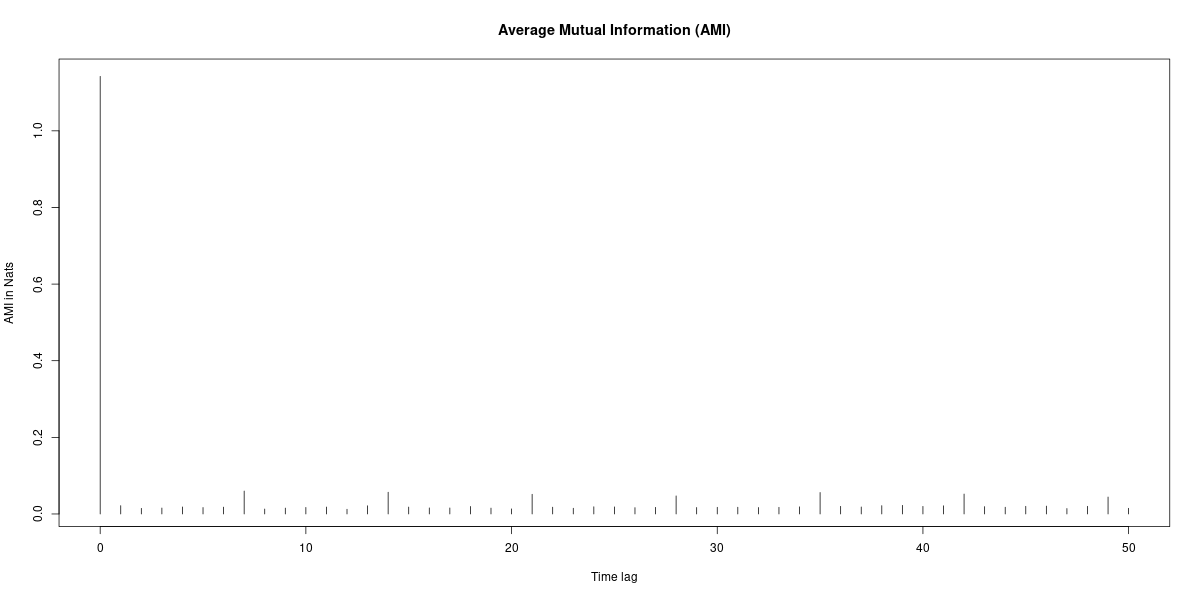

In [25]:
%%R -w 1200 -h 600
nonlinearTseries::mutualInformation(Close_diff,lag.max = 50, main="Información mutua de la diferencia ordinaria")

# 3

In [26]:
df_completo['Trend_Removed'] = trend_removed
df_completo.reset_index(inplace=True)
df_completo

Date    Close  BoxCox_Close  Trend_Removed
0    2000-01-03  21.9375     13.826595       1.251290
1    2000-01-04  20.9375     13.268051       0.706693
2    2000-01-05  21.0625     13.338142       0.790602
3    2000-01-06  21.2500     13.443130       0.909277
4    2000-01-07  21.3750     13.513024       0.992726
...         ...      ...           ...            ...
3646 2009-12-27  12.1800      8.116821       0.175652
3647 2009-12-28  12.4100      8.259597       0.308804
3648 2009-12-29  12.6000      8.377165       0.416783
3649 2009-12-30  12.6600      8.414220       0.444283
3650 2009-12-31  12.7100      8.445075       0.465616

[3651 rows x 4 columns]

In [27]:

split_ratio = 0.8
split_index = int(len(df_completo) * split_ratio)
train_data = df_completo.iloc[:split_index][['Date', 'Close']]
test_data = df_completo.iloc[split_index:][['Date', 'Close']]

plot_("Train and Test Data",
      (train_data['Date'], train_data['Close'], "Train Data"),
      (test_data['Date'], test_data['Close'], "Test Data"))

In [28]:
import pandas as pd
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import mean_squared_error
import warnings
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')


# Listas para almacenar los resultados y residuos
models = ["AAd", "AA", "AM"]
results = {model: [] for model in models}
residuals = {model: [] for model in models}

# Función para entrenar y predecir usando ETS sin estacionalidad
def train_and_predict(df, error, trend, damped, seasonal=None):
    model = ETSModel(df['Close'], error=error, trend=trend, damped_trend=damped, seasonal=seasonal)
    fitted_model = model.fit(disp=False)  # disp=False elimina el verbose
    return fitted_model.forecast(steps=1), fitted_model

# Rolling prediction on test data
for i in tqdm(range(len(test_data)), desc="Rolling ETS models"):
    # Utiliza todos los datos disponibles hasta el punto actual de prueba para entrenar
    expanded_train_data = pd.concat([train_data, test_data.iloc[:i]])
    
    for model in models:
        if model == "AAd":
            pred, _ = train_and_predict(expanded_train_data, error='add', trend='add', damped=True)
        elif model == "AA":
            pred, _ = train_and_predict(expanded_train_data, error='add', trend='add', damped=False)
        elif model == "AM":
            pred, _ = train_and_predict(expanded_train_data, error='add', trend='mul', damped=False)
        
        results[model].append(pred.iloc[0])
        residuals[model].append(test_data['Close'].iloc[i] - pred.iloc[0])

# Convertir los resultados y residuos a DataFrames
results_df = pd.DataFrame(results, index=test_data['Date'])
residuals_df = pd.DataFrame(residuals, index=test_data['Date'])


plot_("Predicciones de ETS",
      (test_data['Date'], test_data['Close'], "Datos de prueba"),
      (results_df.index, results_df["AAd"], "AAd"),
      (results_df.index, results_df["AA"], "AA"),
      (results_df.index, results_df["AM"], "AM"),
      (results_df.index, results_df["AMd"], "AMd"))

Rolling ETS models:   1%|          | 8/731 [00:04<06:17,  1.92it/s]


KeyboardInterrupt: 

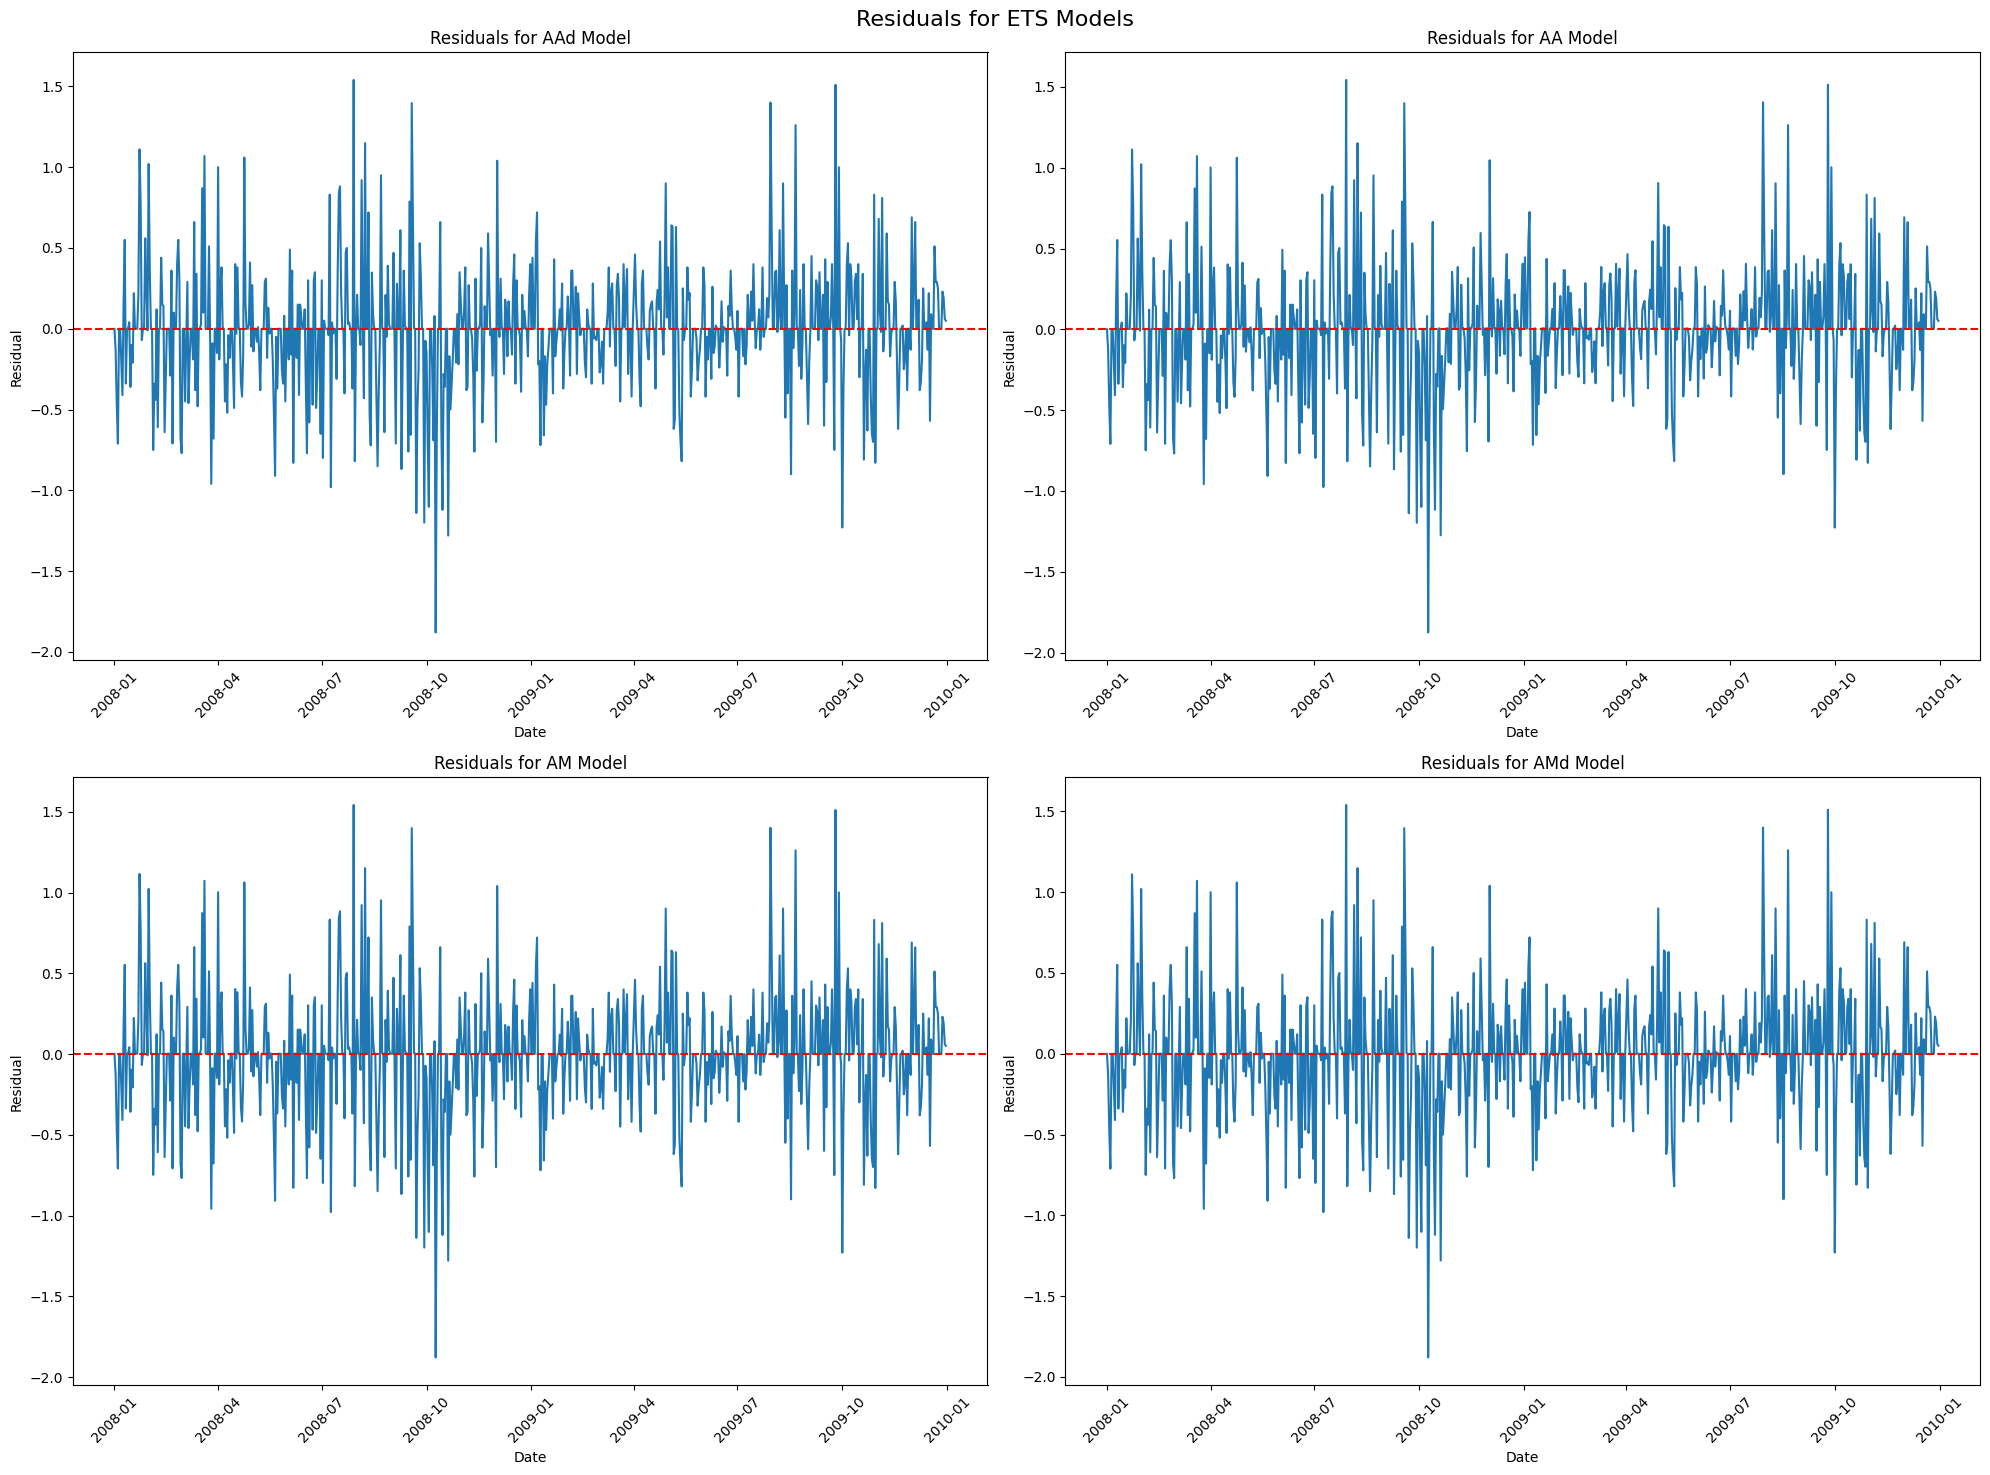

Model       MSE
0   AAd  0.140714
1    AA  0.140741
2    AM  0.140674
3   AMd  0.140714

In [ ]:
import matplotlib.pyplot as plt

# Configuración de los subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Residuals for ETS Models', fontsize=16)

# Aplanar la matriz de subplots para facilitar la iteración
axs = axs.flatten()

# Graficar residuos para cada modelo en subplots
for i, model in enumerate(models):
    axs[i].plot(residuals_df.index, residuals_df[model])
    axs[i].set_title(f'Residuals for {model} Model')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Residual')
    
    # Ajustar el formato de fecha en el eje x
    axs[i].tick_params(axis='x', rotation=45)
    
    # Añadir una línea horizontal en y=0 para referencia
    axs[i].axhline(y=0, color='r', linestyle='--')

# Ajustar el espacio entre subplots
plt.tight_layout()
plt.show()

# Calcular el MSE para cada modelo
mse_results = {
    "Model": models,
    "MSE": [mean_squared_error(test_data['Close'], results_df[model]) for model in models]
}

# Convertir los resultados a un DataFrame
mse_df = pd.DataFrame(mse_results)
display(mse_df)



1. **Media de los residuos:**

Deberíamos esperar que la media sea cercana a cero.
Una media significativamente diferente de cero indica un sesgo sistemático en las predicciones.

2. **Distribución de los residuos:**

Idealmente, los residuos deberían seguir una distribución normal.
Podemos usar un histograma y un gráfico Q-Q para evaluar la normalidad.


3. **Autocorrelación de los residuos:**

Los residuos no deberían mostrar autocorrelación significativa.
Utilizamos la función de autocorrelación (ACF) para verificar esto.


4. **Homocedasticidad:**

La varianza de los residuos debería ser constante a lo largo del tiempo.
Un gráfico de residuos vs. valores ajustados puede ayudar a detectar heterocedasticidad.


5. **Estacionariedad:**

Los residuos deberían ser estacionarios.
Podemos usar pruebas como Dickey-Fuller Aumentada (ADF) para verificar esto.


6. **Valores atípicos:**

Identificar residuos inusualmente grandes que podrían indicar observaciones atípicas.


7. **Patrones o tendencias:**

Los residuos no deberían mostrar patrones o tendencias claras cuando se grafican contra el tiempo.

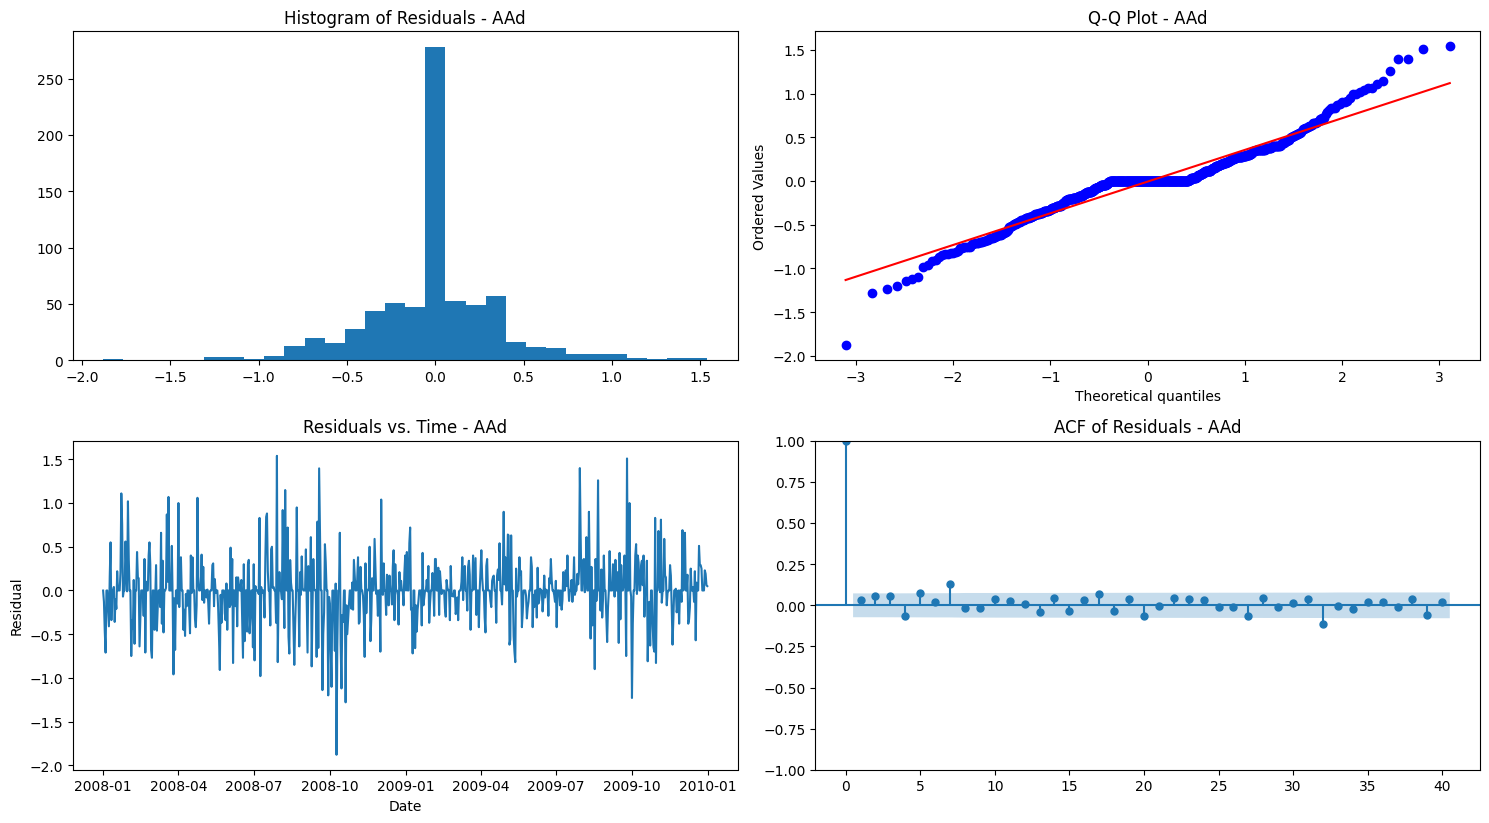

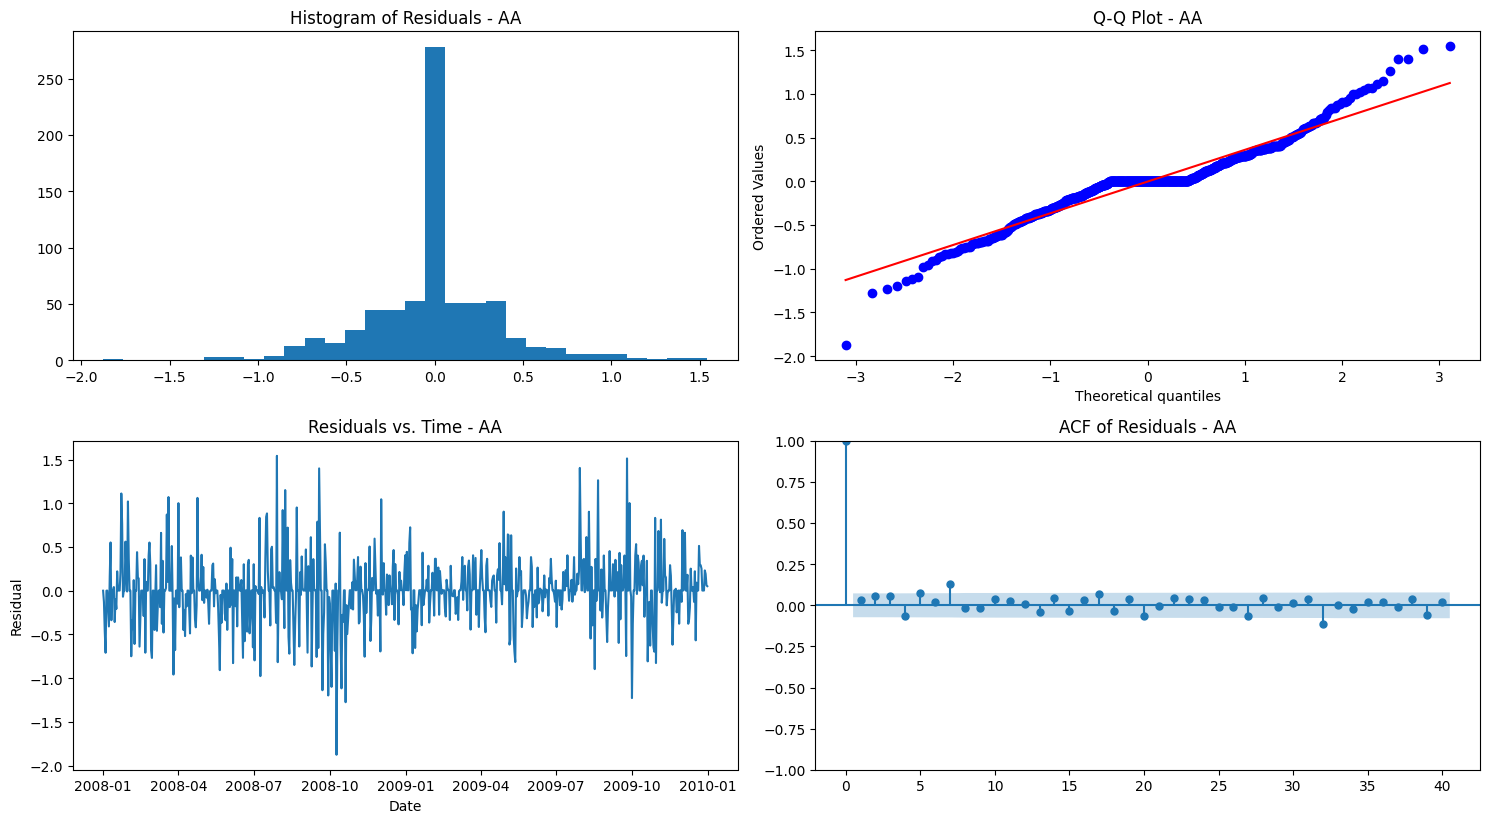

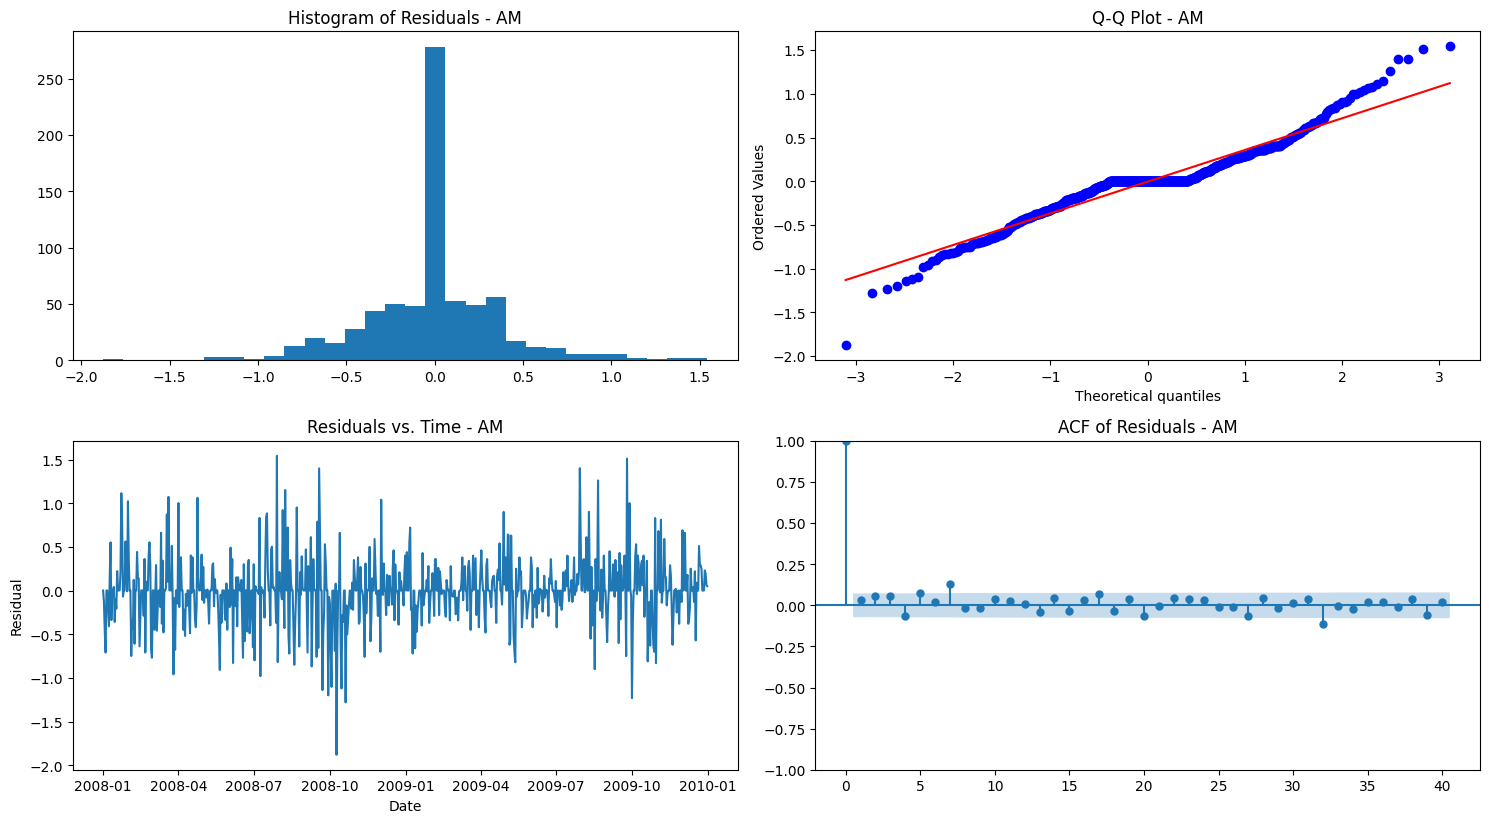

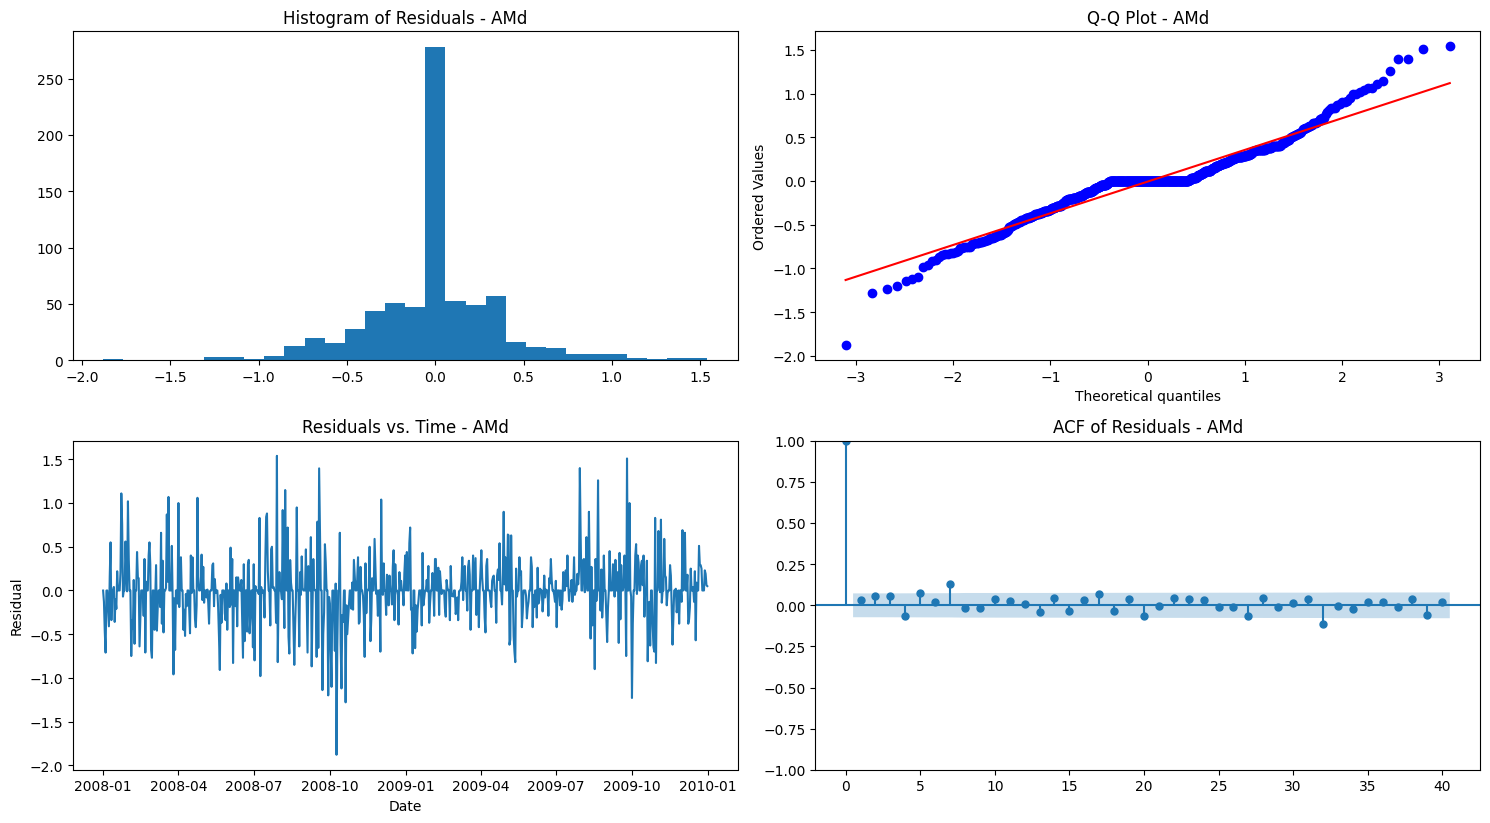

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

def analyze_residuals(residuals, model_name):
    plt.figure(figsize=(15, 12))
    
    # 1. Histograma de residuos
    plt.subplot(321)
    plt.hist(residuals, bins=30)
    plt.title(f'Histogram of Residuals - {model_name}')
    
    # 2. Q-Q plot
    plt.subplot(322)
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot - {model_name}')
    
    # 3. Residuos vs. Tiempo
    plt.subplot(323)
    plt.plot(residuals.index, residuals)
    plt.title(f'Residuals vs. Time - {model_name}')
    plt.xlabel('Date')
    plt.ylabel('Residual')
    
    # 4. ACF de residuos
    plt.subplot(324)
    plot_acf(residuals, lags=40, ax=plt.gca())
    plt.title(f'ACF of Residuals - {model_name}')
    
    
    plt.tight_layout()
    plt.show()
    

# Analizar residuos para cada modelo
for model in models:
    analyze_residuals(residuals_df[model], model)

## Arboles de decisión

In [29]:
split_ratio = 0.8
split_index = int(len(df_completo) * split_ratio)
train_data = df_completo.iloc[:split_index][['Date', 'Trend_Removed']]
test_data = df_completo.iloc[split_index:][['Date', 'Trend_Removed']]

Mejor profundidad: 5
Entrenamiento - R2: 0.8837, MSE: 0.0527
Validación - R2: 0.8957, MSE: 0.0497
Prueba - R2: 0.8508, MSE: 0.1589


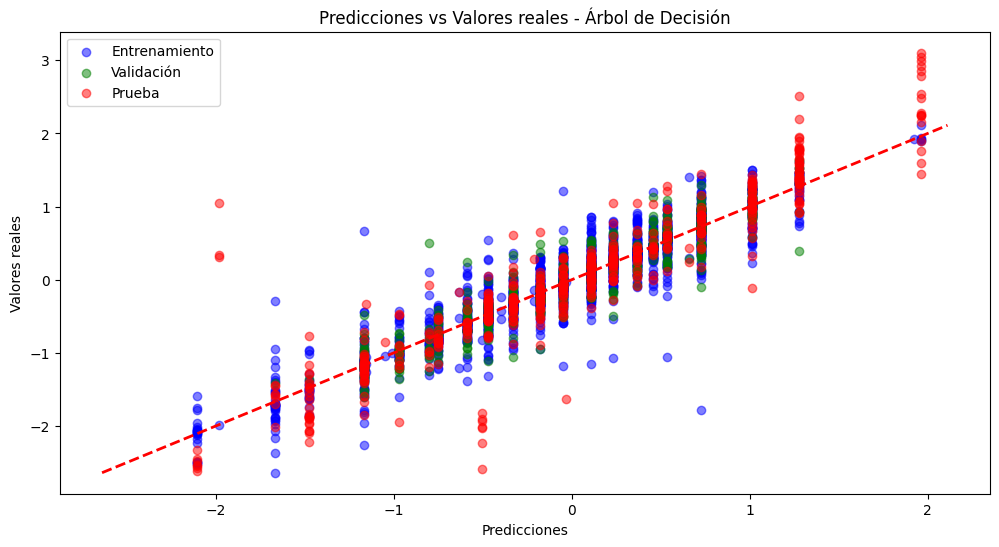

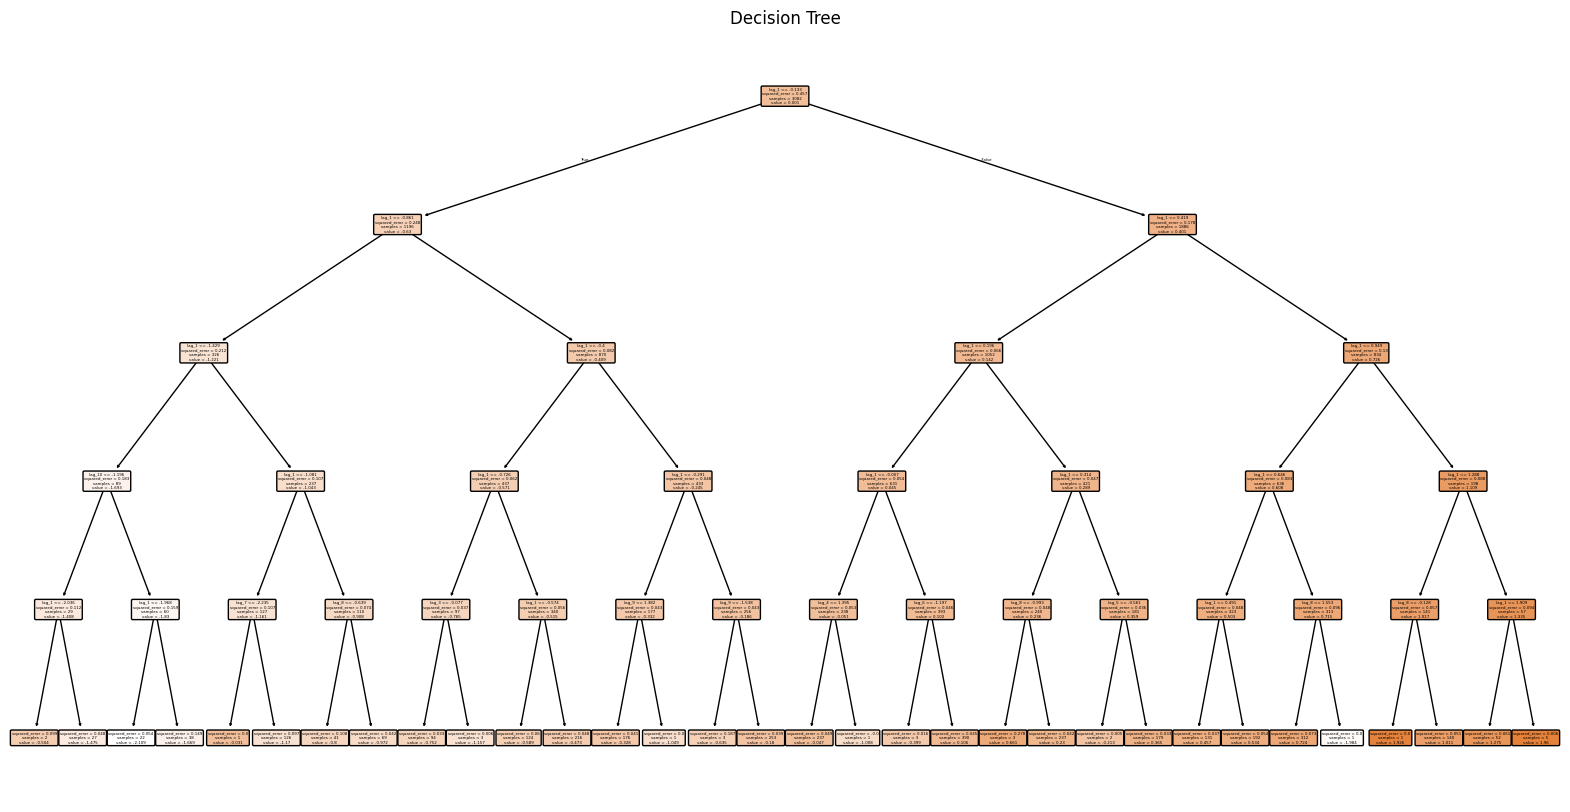

In [30]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Asumiendo que ya tienes train_data y test_data definidos como mencionaste

def create_features(data, lag_start=1, lag_end=10):
    df = pd.DataFrame(index=data.index)
    df['target'] = data['Trend_Removed']
    for i in range(lag_start, lag_end + 1):
        df[f'lag_{i}'] = data['Trend_Removed'].shift(i)
    return df.dropna()

train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

n = len(df_completo)
train_size = int(n * train_ratio)
val_size = int(n * val_ratio)

train_data = df_completo.iloc[:train_size]
val_data = df_completo.iloc[train_size:train_size+val_size]
test_data = df_completo.iloc[train_size+val_size:]

# Crear características para train, validación y test
train_features = create_features(train_data.set_index('Date'))
val_features = create_features(val_data.set_index('Date'))
test_features = create_features(test_data.set_index('Date'))

# Separar características (X) y objetivo (y)
X_train = train_features.drop('target', axis=1)
y_train = train_features['target']
X_val = val_features.drop('target', axis=1)
y_val = val_features['target']
X_test = test_features.drop('target', axis=1)
y_test = test_features['target']

# Función para evaluar el modelo
def evaluate_model(model, X, y, set_name):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    r2 = r2_score(y, predictions)
    print(f"{set_name} - R2: {r2:.4f}, MSE: {mse:.4f}")
    return predictions

# Buscar la mejor profundidad del árbol
best_depth = 0
best_val_r2 = -np.inf

for depth in range(1, 21):
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    val_r2 = r2_score(y_val, tree.predict(X_val))
    
    if val_r2 > best_val_r2:
        best_val_r2 = val_r2
        best_depth = depth

print(f"Mejor profundidad: {best_depth}")

# Entrenar el modelo final con la mejor profundidad
final_model = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
final_model.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))

# Evaluar el modelo en los conjuntos de entrenamiento, validación y prueba
train_pred = evaluate_model(final_model, X_train, y_train, "Entrenamiento")
val_pred = evaluate_model(final_model, X_val, y_val, "Validación")
test_pred = evaluate_model(final_model, X_test, y_test, "Prueba")

# Graficar predicciones vs valores reales
plt.figure(figsize=(12, 6))
plt.scatter(train_pred, y_train, alpha=0.5, label='Entrenamiento', color='blue')
plt.scatter(val_pred, y_val, alpha=0.5, label='Validación', color='green')
plt.scatter(test_pred, y_test, alpha=0.5, label='Prueba', color='red')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Predicciones vs Valores reales - Árbol de Decisión')
plt.legend()
plt.show()

test_date = test_data['Date'] + pd.DateOffset(days=10)

plot_("Predicciones de la Serie Temporal", 
      (test_data['Date'], test_data['Trend_Removed'], "Datos de Prueba"),
      (test_date , test_pred, "Predicciones"))

plt.figure(figsize=(20, 10))
plot_tree(final_model, filled=True, feature_names=X_train.columns, rounded=True)
plt.title("Decision Tree")
plt.show()

residuals = y_test - test_pred

plot_("Residuos del Modelo de Árbol de Decisión",
      (test_data['Date'], residuals, "Residuos"))

## Redes neuronales

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from keras import layers
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import matplotlib.pyplot as plt

# Asumiendo que df_completo es tu DataFrame original con las columnas 'Date' y 'Trend_Removed'

def create_features(data, lag_start=1, lag_end=10):
    df = pd.DataFrame(index=data.index)
    df['target'] = data['Trend_Removed']
    for i in range(lag_start, lag_end + 1):
        df[f'lag_{i}'] = data['Trend_Removed'].shift(i)
    return df.dropna()

# Dividir los datos en entrenamiento, validación y prueba
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

n = len(df_completo)
train_size = int(n * train_ratio)
val_size = int(n * val_ratio)

train_data = df_completo.iloc[:train_size]
val_data = df_completo.iloc[train_size:train_size+val_size]
test_data = df_completo.iloc[train_size+val_size:]

# Crear características para train, validación y test
train_features = create_features(train_data.set_index('Date'))
val_features = create_features(val_data.set_index('Date'))
test_features = create_features(test_data.set_index('Date'))

# Separar características (X) y objetivo (y)
X_train = train_features.drop('target', axis=1)
y_train = train_features['target']
X_val = val_features.drop('target', axis=1)
y_val = val_features['target']
X_test = test_features.drop('target', axis=1)
y_test = test_features['target']

# Normalizar los datos
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
X_val_scaled = scaler_X.transform(X_val)
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1)).flatten()
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Definir el modelo con hiperparámetros ajustables
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))
    
    for i in range(3):  # 3 capas ocultas
        model.add(layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
                               activation=hp.Choice(f'activation_{i}', ['relu', 'tanh', 'sigmoid'])))
    
    model.add(layers.Dense(1))
    
    model.compile(optimizer='adam', loss='mse')
    return model

# Configurar la búsqueda de hiperparámetros
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=50,
    executions_per_trial=2,
    directory='my_dir',
    project_name='NN_hyperparameters'
)

# Realizar la búsqueda
tuner.search(X_train_scaled, y_train_scaled, epochs=100, validation_data=(X_val_scaled, y_val_scaled), 
             callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

# Obtener el mejor modelo
best_model = tuner.get_best_models(num_models=1)[0]

# Reentrenar el mejor modelo para obtener el historial de entrenamiento
history = best_model.fit(X_train_scaled, y_train_scaled, epochs=100, 
                         validation_data=(X_val_scaled, y_val_scaled), 
                         callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)],
                         verbose=0)

# Evaluar el modelo en los conjuntos de entrenamiento, validación y prueba
def evaluate_model(model, X, y, set_name):
    predictions = model.predict(X).flatten()
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, predictions)
    print(f"{set_name} - R2: {r2:.4f}, RMSE: {rmse:.4f}")
    return predictions

train_pred = evaluate_model(best_model, X_train_scaled, y_train_scaled, "Entrenamiento")
val_pred = evaluate_model(best_model, X_val_scaled, y_val_scaled, "Validación")
test_pred = evaluate_model(best_model, X_test_scaled, y_test_scaled, "Prueba")

# Desnormalizar las predicciones
train_pred = scaler_y.inverse_transform(train_pred.reshape(-1, 1)).flatten()
val_pred = scaler_y.inverse_transform(val_pred.reshape(-1, 1)).flatten()
test_pred = scaler_y.inverse_transform(test_pred.reshape(-1, 1)).flatten()


# Imprimir los mejores hiperparámetros
best_hp = tuner.get_best_hyperparameters(1)[0]
print("\nMejores hiperparámetros:")
for i in range(3):
    print(f"Capa {i+1}:")
    print(f"  Unidades: {best_hp.get(f'units_{i}')}")
    print(f"  Activación: {best_hp.get(f'activation_{i}')}")

Reloading Tuner from my_dir/NN_hyperparameters/tuner0.json
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Entrenamiento - R2: 0.8466, RMSE: 0.0555
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Validación - R2: 0.8737, RMSE: 0.0517
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Prueba - R2: 0.9246, RMSE: 0.0596

Mejores hiperparámetros:
Capa 1:
  Unidades: 384
  Activación: tanh
Capa 2:
  Unidades: 512
  Activación: tanh
Capa 3:
  Unidades: 352
  Activación: tanh


In [35]:
date = test_data['Date'] + pd.DateOffset(days=10)

plot_("Predicciones de la Serie Temporal",
      (test_data['Date'], test_data['Trend_Removed'], "Datos de Prueba"),
      (date, test_pred, "Predicciones"))

In [36]:
mse = mean_squared_error(y_test, test_pred)
mse

0.08028963103982713

## RNN

Reloading Tuner from my_dir_RNN/LSTM_GRU_hyperparameters/tuner0.json
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
Test set - R2: 0.9369, RMSE: 0.0546


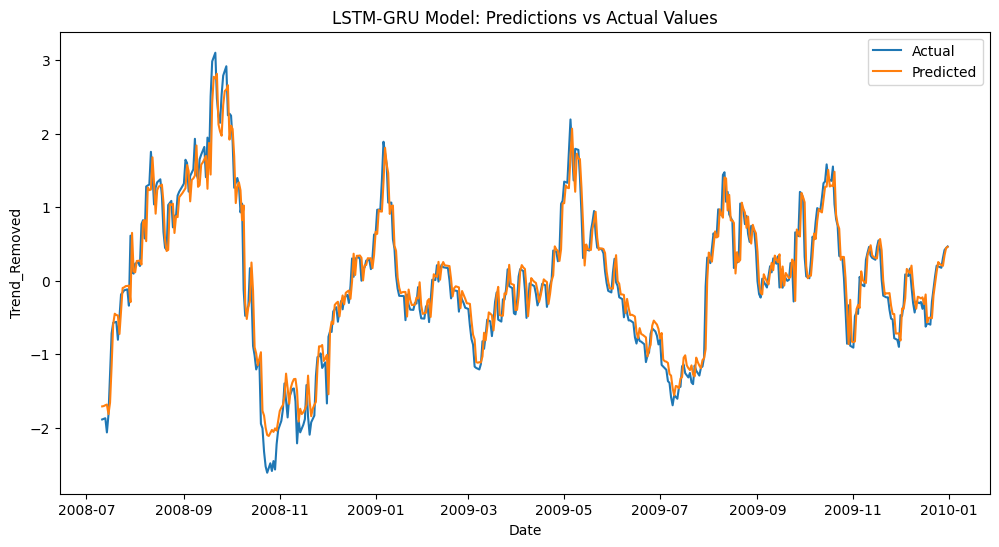


Best Hyperparameters:
LSTM units: 192
GRU units: 64
Number of dense layers: 2
Dense layer 1:
  Units: 96
  Activation: relu
Dense layer 2:
  Units: 112
  Activation: tanh

Mean Squared Error: 0.0672


In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from keras import layers
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import matplotlib.pyplot as plt

# Assuming df_completo is your original DataFrame with 'Date' and 'Trend_Removed' columns

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Split the data into train, validation, and test sets
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

n = len(df_completo)
train_size = int(n * train_ratio)
val_size = int(n * val_ratio)

train_data = df_completo.iloc[:train_size]
val_data = df_completo.iloc[train_size:train_size+val_size]
test_data = df_completo.iloc[train_size+val_size:]

# Normalize the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[['Trend_Removed']])
val_scaled = scaler.transform(val_data[['Trend_Removed']])
test_scaled = scaler.transform(test_data[['Trend_Removed']])

# Create sequences
seq_length = 10
X_train, y_train = create_sequences(train_scaled, seq_length)
X_val, y_val = create_sequences(val_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

# Define the model with adjustable hyperparameters
def build_model(hp):
    model = keras.Sequential()
    
    # LSTM layer
    model.add(layers.LSTM(units=hp.Int('lstm_units', min_value=32, max_value=256, step=32),
                          return_sequences=True,
                          input_shape=(seq_length, 1)))
    
    # GRU layer
    model.add(layers.GRU(units=hp.Int('gru_units', min_value=32, max_value=256, step=32)))
    
    # Dense layers
    for i in range(hp.Int('num_dense_layers', 1, 3)):
        model.add(layers.Dense(units=hp.Int(f'dense_units_{i}', min_value=16, max_value=128, step=16),
                               activation=hp.Choice(f'dense_activation_{i}', ['relu', 'tanh'])))
    
    model.add(layers.Dense(1))
    
    model.compile(optimizer='adam', loss='mse')
    return model

# Configure hyperparameter search
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=30,
    executions_per_trial=2,
    directory='my_dir_RNN',
    project_name='LSTM_GRU_hyperparameters'
)

# Perform the search
tuner.search(X_train, y_train, epochs=100, validation_data=(X_val, y_val), 
             callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Retrain the best model to get training history
history = best_model.fit(X_train, y_train, epochs=100, 
                         validation_data=(X_val, y_val), 
                         callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)],
                         verbose=0)

# Evaluate the model on test set
test_predictions = best_model.predict(X_test).flatten()
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, test_predictions)

print(f"Test set - R2: {r2:.4f}, RMSE: {rmse:.4f}")

# Inverse transform predictions and actual values
test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1)).flatten()
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'].iloc[seq_length:], y_test_actual, label='Actual')
plt.plot(test_data['Date'].iloc[seq_length:], test_predictions, label='Predicted')
plt.title('LSTM-GRU Model: Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Trend_Removed')
plt.legend()
plt.show()

# Print the best hyperparameters
best_hp = tuner.get_best_hyperparameters(1)[0]
print("\nBest Hyperparameters:")
print(f"LSTM units: {best_hp.get('lstm_units')}")
print(f"GRU units: {best_hp.get('gru_units')}")
print(f"Number of dense layers: {best_hp.get('num_dense_layers')}")
for i in range(best_hp.get('num_dense_layers')):
    print(f"Dense layer {i+1}:")
    print(f"  Units: {best_hp.get(f'dense_units_{i}')}")
    print(f"  Activation: {best_hp.get(f'dense_activation_{i}')}")

# Calculate and print MSE
mse = mean_squared_error(y_test_actual, test_predictions)
print(f"\nMean Squared Error: {mse:.4f}")

Reloading Tuner from my_dir/LSTM_hyperparameters/tuner0.json
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
LSTM - Test set - R2: 0.9394, RMSE: 0.0535


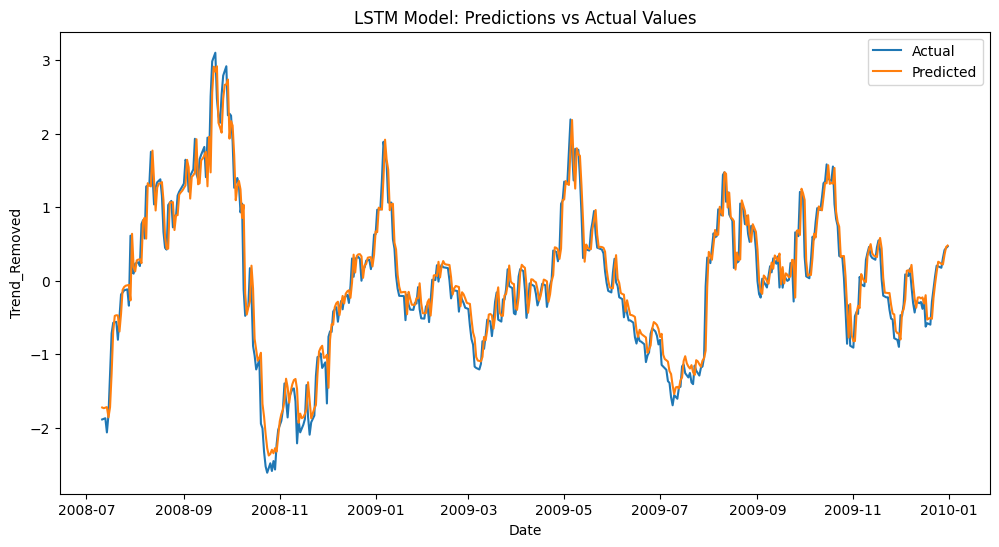


Best LSTM Hyperparameters:
LSTM units (layer 1): 64
LSTM units (layer 2): 224
LSTM Mean Squared Error: 0.0029
Reloading Tuner from my_dir/GRU_hyperparameters/tuner0.json
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
GRU - Test set - R2: 0.9175, RMSE: 0.0624


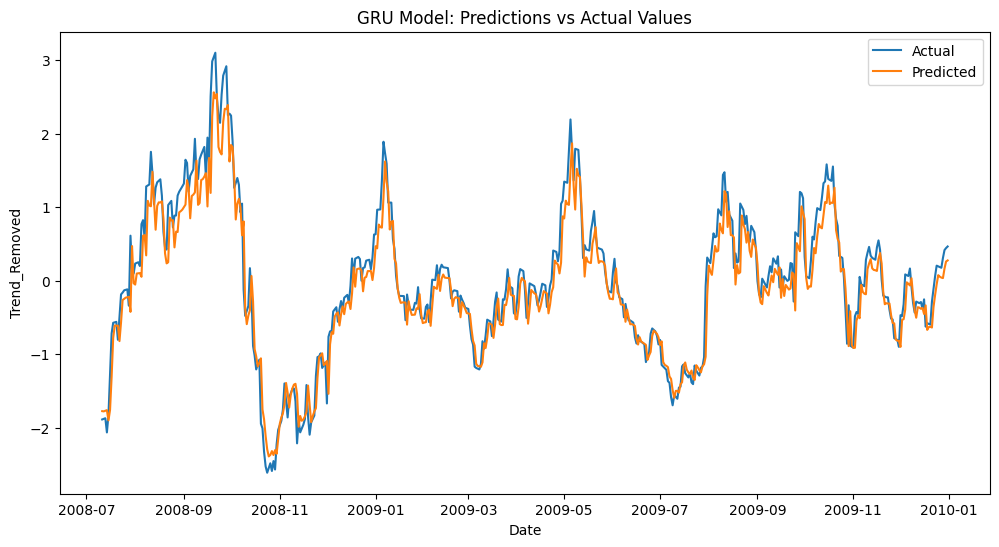


Best GRU Hyperparameters:
GRU units (layer 1): 96
GRU units (layer 2): 32
GRU Mean Squared Error: 0.0039


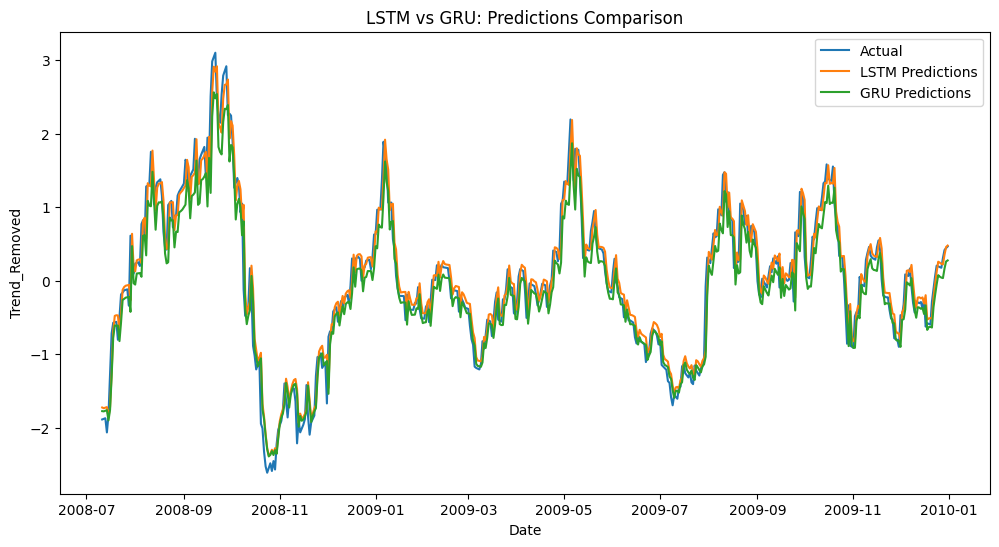

In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from keras import layers
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import matplotlib.pyplot as plt

# Assuming df_completo is your original DataFrame with 'Date' and 'Trend_Removed' columns

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Split the data into train, validation, and test sets
train_ratio, val_ratio, test_ratio = 0.7, 0.15, 0.15
n = len(df_completo)
train_size, val_size = int(n * train_ratio), int(n * val_ratio)

train_data = df_completo.iloc[:train_size]
val_data = df_completo.iloc[train_size:train_size+val_size]
test_data = df_completo.iloc[train_size+val_size:]

# Normalize the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[['Trend_Removed']])
val_scaled = scaler.transform(val_data[['Trend_Removed']])
test_scaled = scaler.transform(test_data[['Trend_Removed']])

# Create sequences
seq_length = 10
X_train, y_train = create_sequences(train_scaled, seq_length)
X_val, y_val = create_sequences(val_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

# Define the LSTM model with adjustable hyperparameters
def build_lstm_model(hp):
    model = keras.Sequential()
    model.add(layers.LSTM(units=hp.Int('lstm_units', min_value=32, max_value=256, step=32),
                          return_sequences=True,
                          input_shape=(seq_length, 1)))
    model.add(layers.LSTM(units=hp.Int('lstm_units_2', min_value=32, max_value=256, step=32)))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Define the GRU model with adjustable hyperparameters
def build_gru_model(hp):
    model = keras.Sequential()
    model.add(layers.GRU(units=hp.Int('gru_units', min_value=32, max_value=256, step=32),
                         return_sequences=True,
                         input_shape=(seq_length, 1)))
    model.add(layers.GRU(units=hp.Int('gru_units_2', min_value=32, max_value=256, step=32)))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Function to perform hyperparameter tuning and training
def tune_and_train(build_model, model_name):
    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=25,
        executions_per_trial=2,
        directory='my_dir',
        project_name=f'{model_name}_hyperparameters'
    )

    tuner.search(X_train, y_train, epochs=100, validation_data=(X_val, y_val), 
                 callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

    best_model = tuner.get_best_models(num_models=1)[0]
    
    history = best_model.fit(X_train, y_train, epochs=100, 
                             validation_data=(X_val, y_val), 
                             callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)],
                             verbose=0)
    
    return best_model, tuner.get_best_hyperparameters(1)[0]

# Function to evaluate and plot results
def evaluate_and_plot(model, model_name):
    test_predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, test_predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, test_predictions)

    print(f"{model_name} - Test set - R2: {r2:.4f}, RMSE: {rmse:.4f}")

    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1)).flatten()
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

    plt.figure(figsize=(12, 6))
    plt.plot(test_data['Date'].iloc[seq_length:], y_test_actual, label='Actual')
    plt.plot(test_data['Date'].iloc[seq_length:], test_predictions, label='Predicted')
    plt.title(f'{model_name} Model: Predictions vs Actual Values')
    plt.xlabel('Date')
    plt.ylabel('Trend_Removed')
    plt.legend()
    plt.show()

    return mse, y_test_actual, test_predictions

# Train and evaluate LSTM model
lstm_model, lstm_hp = tune_and_train(build_lstm_model, 'LSTM')
lstm_mse, lstm_actual, lstm_pred = evaluate_and_plot(lstm_model, 'LSTM')

print("\nBest LSTM Hyperparameters:")
print(f"LSTM units (layer 1): {lstm_hp.get('lstm_units')}")
print(f"LSTM units (layer 2): {lstm_hp.get('lstm_units_2')}")
print(f"LSTM Mean Squared Error: {lstm_mse:.4f}")

# Train and evaluate GRU model
gru_model, gru_hp = tune_and_train(build_gru_model, 'GRU')
gru_mse, gru_actual, gru_pred = evaluate_and_plot(gru_model, 'GRU')

print("\nBest GRU Hyperparameters:")
print(f"GRU units (layer 1): {gru_hp.get('gru_units')}")
print(f"GRU units (layer 2): {gru_hp.get('gru_units_2')}")
print(f"GRU Mean Squared Error: {gru_mse:.4f}")

# Compare LSTM and GRU predictions
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'].iloc[seq_length:], lstm_actual, label='Actual')
plt.plot(test_data['Date'].iloc[seq_length:], lstm_pred, label='LSTM Predictions')
plt.plot(test_data['Date'].iloc[seq_length:], gru_pred, label='GRU Predictions')
plt.title('LSTM vs GRU: Predictions Comparison')
plt.xlabel('Date')
plt.ylabel('Trend_Removed')
plt.legend()
plt.show()

In [39]:
plot_("Predicciones de la Serie Temporal",
      (test_data['Date'], test_data['Trend_Removed'], "Datos de Prueba"),
      (test_data['Date'].iloc[seq_length:], lstm_pred, "Predicciones LSTM"),
      (test_data['Date'].iloc[seq_length:], gru_pred, "Predicciones GRU"))